`키워드 추출` : 텍스트의 중심 내용은 무엇일까?
=======


### Counter

In [1]:
from collections import Counter

In [2]:
text = ['I go to my home my home is very large I went out my home I go to the market I bought a yellow lemon I go back to home']


In [3]:
Counter('hello world')

Counter({'h': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1})

In [4]:
Counter('hello world').most_common()

[('l', 3),
 ('o', 2),
 ('h', 1),
 ('e', 1),
 (' ', 1),
 ('w', 1),
 ('r', 1),
 ('d', 1)]

In [5]:
Counter(text)

Counter({'I go to my home my home is very large I went out my home I go to the market I bought a yellow lemon I go back to home': 1})

In [6]:
for sen in text: 
    word = sen.split(' ')
    print(word)

['I', 'go', 'to', 'my', 'home', 'my', 'home', 'is', 'very', 'large', 'I', 'went', 'out', 'my', 'home', 'I', 'go', 'to', 'the', 'market', 'I', 'bought', 'a', 'yellow', 'lemon', 'I', 'go', 'back', 'to', 'home']


In [7]:
counts = Counter(word)
counts

Counter({'I': 5,
         'go': 3,
         'to': 3,
         'my': 3,
         'home': 4,
         'is': 1,
         'very': 1,
         'large': 1,
         'went': 1,
         'out': 1,
         'the': 1,
         'market': 1,
         'bought': 1,
         'a': 1,
         'yellow': 1,
         'lemon': 1,
         'back': 1})

In [9]:
vocab = sorted(counts, key=counts.get, reverse=True)
vocab

['I',
 'home',
 'go',
 'to',
 'my',
 'is',
 'very',
 'large',
 'went',
 'out',
 'the',
 'market',
 'bought',
 'a',
 'yellow',
 'lemon',
 'back']

### Count Vectorizer

- 빈도수 기반
- 조사, 관사 등의 의미없는 단어에 높은 수치 부여 확률 높아짐.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
text = ['I go to my home my home is very large', 
        'I went out my home I go to the market', 
        'I bought a yellow lemon I go back to home']

cv_vectorizer = CountVectorizer()
print(cv_vectorizer.fit_transform(text).toarray())

[[0 0 1 2 1 1 0 0 2 0 0 1 1 0 0]
 [0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]
 [1 1 1 1 0 0 1 0 0 0 0 1 0 0 1]]


In [13]:
cv_vectorizer.fit_transform(text).toarray().shape

(3, 15)

In [15]:
print(cv_vectorizer.vocabulary_) #알파벳순

{'go': 2, 'to': 11, 'my': 8, 'home': 3, 'is': 4, 'very': 12, 'large': 5, 'went': 13, 'out': 9, 'the': 10, 'market': 7, 'bought': 1, 'yellow': 14, 'lemon': 6, 'back': 0}



### Tf-idf 
- `어떤 단어`가 특정 문서에서 **`얼마나 중요한지를 수치화하는 모델`**
- 한 글자의 단어는 단어 사전에서 제외



- TF-IDF는 `개별 문서에서 자주 등장하는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 등장하는 단어에 대해서는 패널티 값을 부여.`


- **`모든 문서에서 자주 등장하는 단어에는 페널티`** 를 주고, `해당 문서에서만 자주 등장하는 단어에 높은 가중치`를 주는 방식 


- 그렇게 함으로써 해당 단어가 `실질적으로 중요한 단어`인지 검사하는 것

> 여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치

> 문서의 핵심어를 추출하거나, 검색 엔진에서 검색 결과의 순위를 결정하거나, 문서들 사이의 비슷한 정도를 구하는 등의 용도로 사용할 수 있다.

- **TF-IDF란 TF와 IDF를 곱한 것**
>`TF(term frequency) : 단어 빈도`란 어떤 단어가 특정 문서에서 얼마나 많이 등장하는지의 값

 > `IDF(inverse document frequency)`란 어떤 단어가 전체 문서에서 얼마나 많이 등장하는지의 값의 역수


- TF는 결국 '많이 나올수록 중요한 단어다.' 라는 것을 가정으로 함.
- 한 문장만 보면 이상할 수도 있지만, 대부분 긴 글에서는 통하는 논리.

```python 

class sklearn.feature_extraction.text.TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

```

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [18]:
text = ['I go to my home my home is very large', 
        'I went out my home I go to the market', 
        'I bought a yellow lemon I go back to home']


In [19]:
vectorizer = TfidfVectorizer()

In [20]:
vectorizer.fit(text) #vectorizer 가 단어 학습

TfidfVectorizer()

In [21]:
vectorizer.vocabulary_ #vectorizer가 학습한 단어사전 출력

{'go': 2,
 'to': 11,
 'my': 8,
 'home': 3,
 'is': 4,
 'very': 12,
 'large': 5,
 'went': 13,
 'out': 9,
 'the': 10,
 'market': 7,
 'bought': 1,
 'yellow': 14,
 'lemon': 6,
 'back': 0}

In [22]:
sorted(vectorizer.vocabulary_.items()) #단어사전 정렬
#알파벳 오름차순 순서로 인덱스가 부여된다는 사실

[('back', 0),
 ('bought', 1),
 ('go', 2),
 ('home', 3),
 ('is', 4),
 ('large', 5),
 ('lemon', 6),
 ('market', 7),
 ('my', 8),
 ('out', 9),
 ('the', 10),
 ('to', 11),
 ('very', 12),
 ('went', 13),
 ('yellow', 14)]

In [23]:
vectorizer.get_feature_names()

['back',
 'bought',
 'go',
 'home',
 'is',
 'large',
 'lemon',
 'market',
 'my',
 'out',
 'the',
 'to',
 'very',
 'went',
 'yellow']

In [24]:
array = vectorizer.transform(text).toarray()

In [25]:
array

array([[0.        , 0.        , 0.2170186 , 0.4340372 , 0.36744443,
        0.36744443, 0.        , 0.        , 0.55890191, 0.        ,
        0.        , 0.2170186 , 0.36744443, 0.        , 0.        ],
       [0.        , 0.        , 0.24902824, 0.24902824, 0.        ,
        0.        , 0.        , 0.42164146, 0.3206692 , 0.42164146,
        0.42164146, 0.24902824, 0.        , 0.42164146, 0.        ],
       [0.44514923, 0.44514923, 0.26291231, 0.26291231, 0.        ,
        0.        , 0.44514923, 0.        , 0.        , 0.        ,
        0.        , 0.26291231, 0.        , 0.        , 0.44514923]])

In [26]:
import pandas as pd

df =pd.DataFrame(array)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.217019,0.434037,0.367444,0.367444,0.000000,0.000000,0.558902,0.000000,0.000000,0.217019,0.367444,0.000000,0.000000
1,0.000000,0.000000,0.249028,0.249028,0.000000,0.000000,0.000000,0.421641,0.320669,0.421641,0.421641,0.249028,0.000000,0.421641,0.000000
2,0.445149,0.445149,0.262912,0.262912,0.000000,0.000000,0.445149,0.000000,0.000000,0.000000,0.000000,0.262912,0.000000,0.000000,0.445149


In [32]:
lst = sorted(vectorizer.vocabulary_.items()) 
lst[3][0]


'home'

In [33]:
columns =[]
for i in range(len(lst)):
    columns.append(lst[i][0])
    
df.columns = [columns]

In [34]:
df

,back,bought,go,home,is,large,lemon,market,my,out,the,to,very,went,yellow
0,0.000000,0.000000,0.217019,0.434037,0.367444,0.367444,0.000000,0.000000,0.558902,0.000000,0.000000,0.217019,0.367444,0.000000,0.000000
1,0.000000,0.000000,0.249028,0.249028,0.000000,0.000000,0.000000,0.421641,0.320669,0.421641,0.421641,0.249028,0.000000,0.421641,0.000000
2,0.445149,0.445149,0.262912,0.262912,0.000000,0.000000,0.445149,0.000000,0.000000,0.000000,0.000000,0.262912,0.000000,0.000000,0.445149


In [36]:
# from collections import defaultdict
# sp_matrix = vectorizer.fit_transform(text)

# word2id = defaultdict(lambda : 0)
# for idx, feature in enumerate(vectorizer.get_feature_names()):
#     word2id[feature] = idx

# for i, sent in enumerate(text):
#     print('====== document[%d] ======' % i)
#     print( [ (token, sp_matrix[i, word2id[token]]) for token in sent.split() ] )
#     print(' ')

In [37]:
#적어도 특정 단어가 포함된 문서의 수가 2개인 것
#DF에 최솟값을 설정하여 

min_df_vectorizer = TfidfVectorizer(min_df = 2) 
min_df_vectorizer.fit(text) 
sorted(min_df_vectorizer.vocabulary_.items())



[('go', 0), ('home', 1), ('my', 2), ('to', 3)]

### 워드 클라우드

- generate_from_text()는 텍스트에서 `단어의 빈도를 계산`하여 이를 기반으로 클라우드를 그려 시각화 할 수 있음. 
- https://lovit.github.io/nlp/2018/04/17/word_cloud/

In [38]:
# !pip install wordcloud
# !pip install matplotlib


In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [40]:
text = 'I go to my home my home is very large I went out my home I go to the market I bought a yellow lemon I go back to home'

#항상 텍스트 처리 해주어야 함. 

In [41]:
wordcloud = WordCloud(background_color='white')
wordcloud = wordcloud.generate_from_text(text)


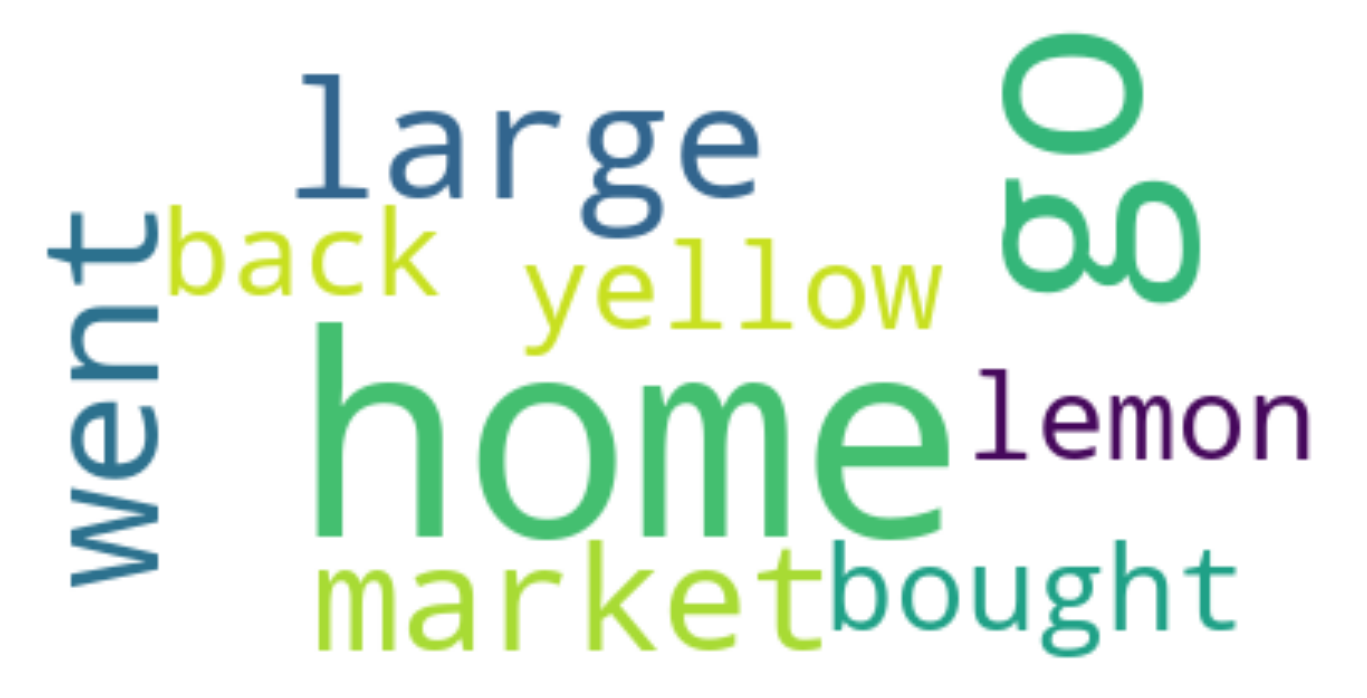

In [42]:
plt.figure(figsize=(12,12)) #이미지 사이즈 지정
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off') #x y 축 숫자 제거
plt.show() 


In [44]:
from wordcloud import STOPWORDS

In [45]:
spwords=set(STOPWORDS)
spwords.add('yellow')

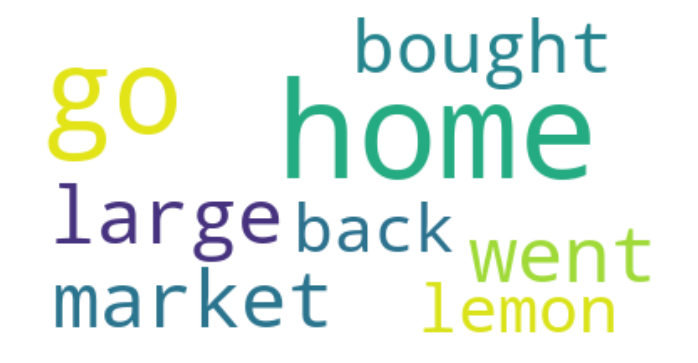

In [46]:
wordcloud2 = WordCloud(background_color='white',stopwords=spwords).generate(text)
plt.imshow(wordcloud2,interpolation="bilinear")
plt.axis('off') #x y 축 숫자 제거
plt.show() 
